<a href="https://colab.research.google.com/github/EmmanueleVilla/Tensorflow---Serie-youtube/blob/main/Tensorflow%20%232%20-%20Feed%20forward%20neural%20network%20per%20classificazione%20dataset%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random as random
tf.__version__

'2.8.2'

In [2]:
# 1. Import the dataset
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data.shape

(60000, 28, 28)

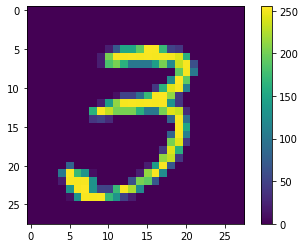

In [5]:
# 2. Show some data example
plt.figure()
plt.imshow(random.choice(train_data))
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# 3. Create the neural network model

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Lambda(lambda x : x / 255.0),
        tf.keras.layers.Dense(56, activation="sigmoid"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)

In [7]:
# 4. Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

In [8]:
# 5. Fit the model
history = model.fit(train_data, train_labels, epochs=10, verbose=0)

In [9]:
# 6. Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3071 - accuracy: 0.9151


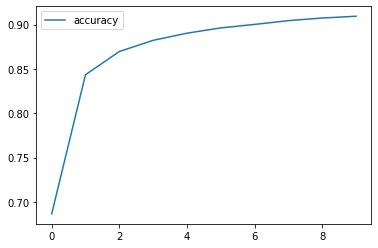

In [10]:
# 7. Plot the training history
pd.DataFrame(history.history)[["accuracy"]].plot()